##PROJECT NAME

REGRESSION PROJECT FRO SEAOULBIKA DATASET

## GITHUB LINK

##PROBLEM STATEMENT

What is the impact of various weather conditions (temperature, humidity, precipitation) on the number of bike rentals in Seoul? Understanding this relationship could help in planning for bike availability during different weather scenarios."

##BUSINESS CONTEXT

The Seoul Bike dataset is pivotal for optimizing the city's bike-sharing system, which was introduced to reduce carbon emissions and promote sustainable transport. By analyzing data on factors like weather, seasons, and holidays, city planners can enhance user experience, optimize operations, support policy decisions, and achieve sustainability goals. The overall objective is to improve bike availability, reduce operational costs, and contribute to a greener, healthier city.

##DATA UNDERSTANDING


Dataset Overview:

The dataset records daily bike rental counts along with various features that could affect bike usage, such as weather conditions, temporal variables, and holidays.
It includes both continuous and categorical variables, which can be used to explore and predict bike demand patterns.

Key Variables:

Date: The specific day of the record. This variable helps analyze temporal trends like daily, weekly, and monthly patterns.

Rented Bike Count: The number of bikes rented on a given day. This is the target variable for prediction and analysis.

Hour: The hour of the day, which can be used to understand hourly rental patterns.

Temperature (°C): The temperature in degrees Celsius, influencing people's likelihood to rent bikes.

Humidity (%): The humidity level, which may affect bike rentals.
Windspeed (m/s): The wind speed, another weather factor influencing bike usage.

Visibility (10m): The visibility in meters, affecting safety and comfort levels for cyclists.

Dew Point Temperature (°C): Reflects the atmospheric moisture, potentially affecting comfort during biking.

Solar Radiation (MJ/m2): The amount of solar energy, which could influence outdoor activity levels.

Rainfall (mm): The amount of rain, which usually negatively impacts bike rentals.

Snowfall (cm): The amount of snow, another factor that likely reduces bike usage.

Seasons: The season during which the record was taken (e.g., Winter, Spring, Summer, Autumn). Seasonality can significantly affect bike rental patterns.

Holiday: A binary variable indicating whether the day was a holiday, which can lead to different usage patterns compared to regular days.

Functioning Day: A binary variable indicating whether the bike-sharing system was operational on that day.


##DATA LOADING AND CLEANUP

In [ ]:
# Specify the file path
file_path=r'/content/SeoulBikeData.csv'

# Load the dataset with proper encoding
df = pd.read_csv(file_path,encoding='ISO-8859-1')

In [ ]:
#first five rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#describe summary for the dataset
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
# convert the "Date" column in the DataFrame df from a string format to a datetime object
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [ ]:
#info for the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# return the data type of the "Date" column in the DataFrame `df`.
df.Date.dtype

dtype('<M8[ns]')

In [ ]:
# extract the year from each entry in the "Date" column of the DataFrame `df` and assigns it to a new column named "year."
df["year"] = df["Date"].dt.year

In [ ]:
# extract the month from each entry in the "Date" column of the DAtaFrame 'df' and assigns it to a new column named "month"
df["month"] = df["Date"].dt.month

In [ ]:
# extract the day from each entry in the "Date" column of the DataFrame 'df' and assigns it to a new column named 'day'
df["day"] = df["Date"].dt.day

In [ ]:
# extract the weekday from the each entry in the "Date" column and get the day name
df["weekday"] = df["Date"].dt.day_name()

In [ ]:
#updated df
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


In [ ]:
#Drop the "Date" column
df.drop(columns="Date", axis =1,inplace =True)

In [ ]:
# identify and list all numerical columns in the DataFrame `df`.
numerical_var = [var for var in df.columns if df[var].dtype != "O" ]
numerical_var

NameError: name 'df' is not defined

In [ ]:
# This code filters the list of numerical variables to include only those with fewer than 25 unique values, identifying them as discrete variables.
descrete_var = [var for var in numerical_var if len(df[var].unique()) < 25]
descrete_var

['Hour', 'year', 'month']

In [ ]:
# This code creates a list of column names from the DataFrame `df` that are not included in the `numerical_var` list, thereby identifying them as categorical variables.
categorical_var = [var for var in df.columns if var not in numerical_var ]
categorical_var

['Seasons', 'Holiday', 'Functioning Day', 'weekday']

In [ ]:
df

NameError: name 'df' is not defined

##EXPLORATORY DATA ANALYSIS

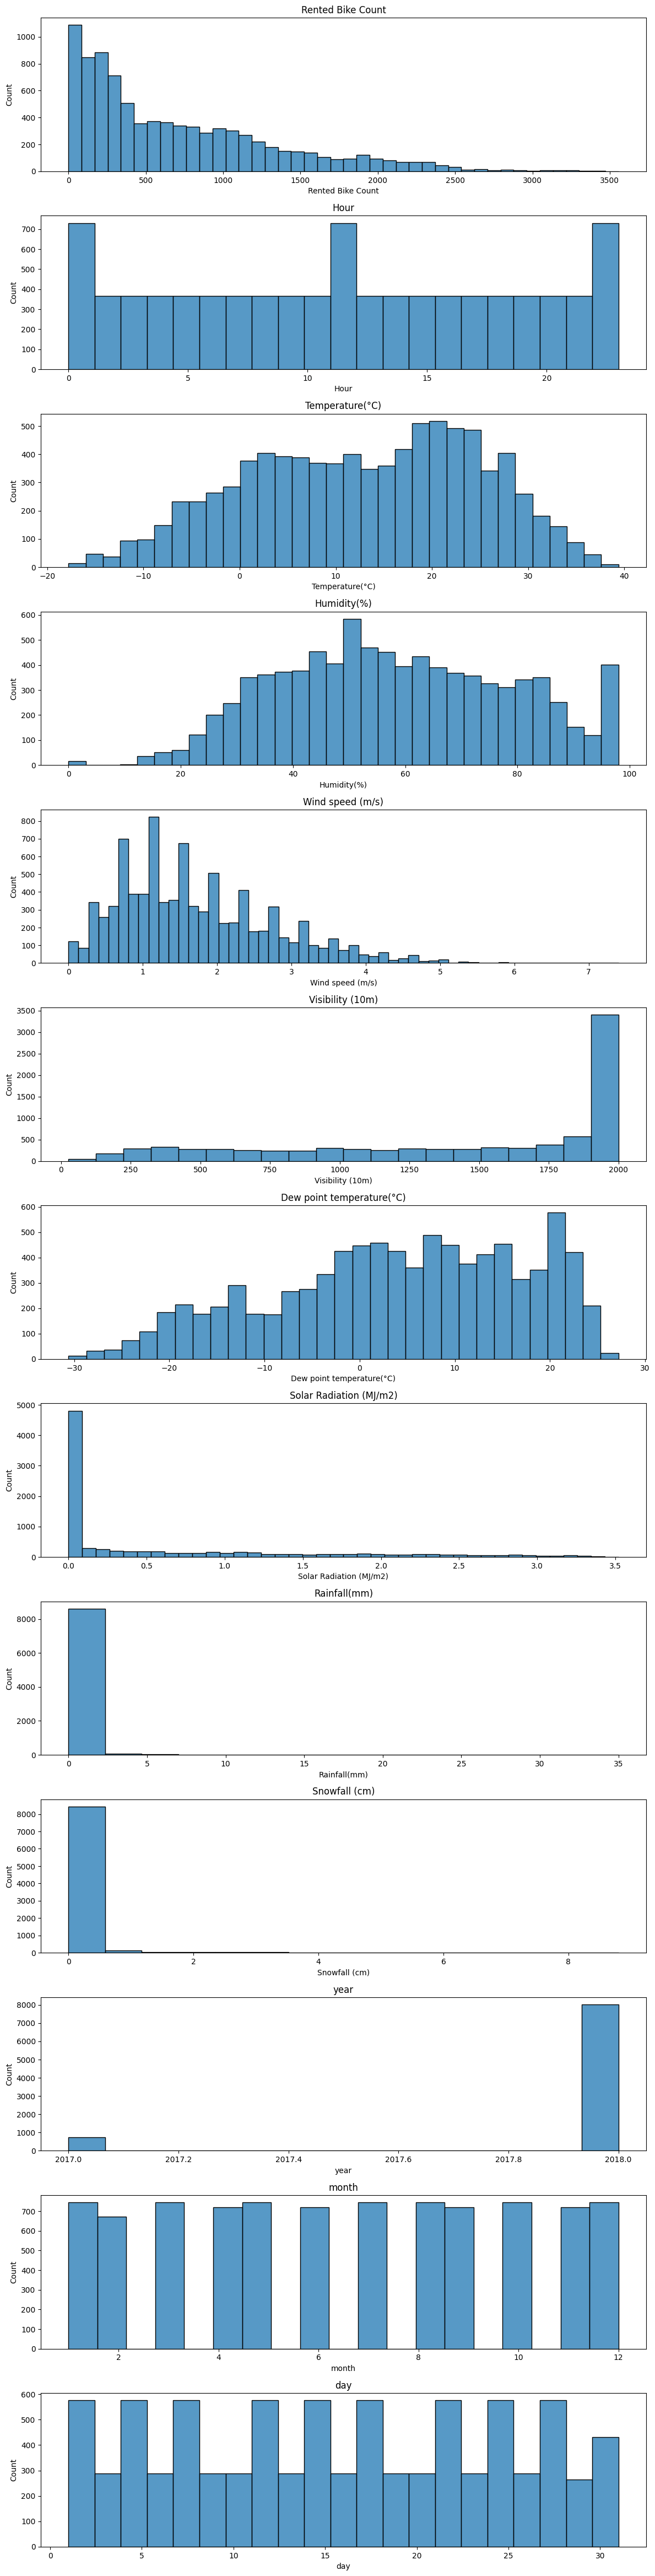

In [ ]:
#Plot for the numerical_variables
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.histplot(x = var , data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()

We can see bike countings, temprature and hour which is helpful in the further predictions.

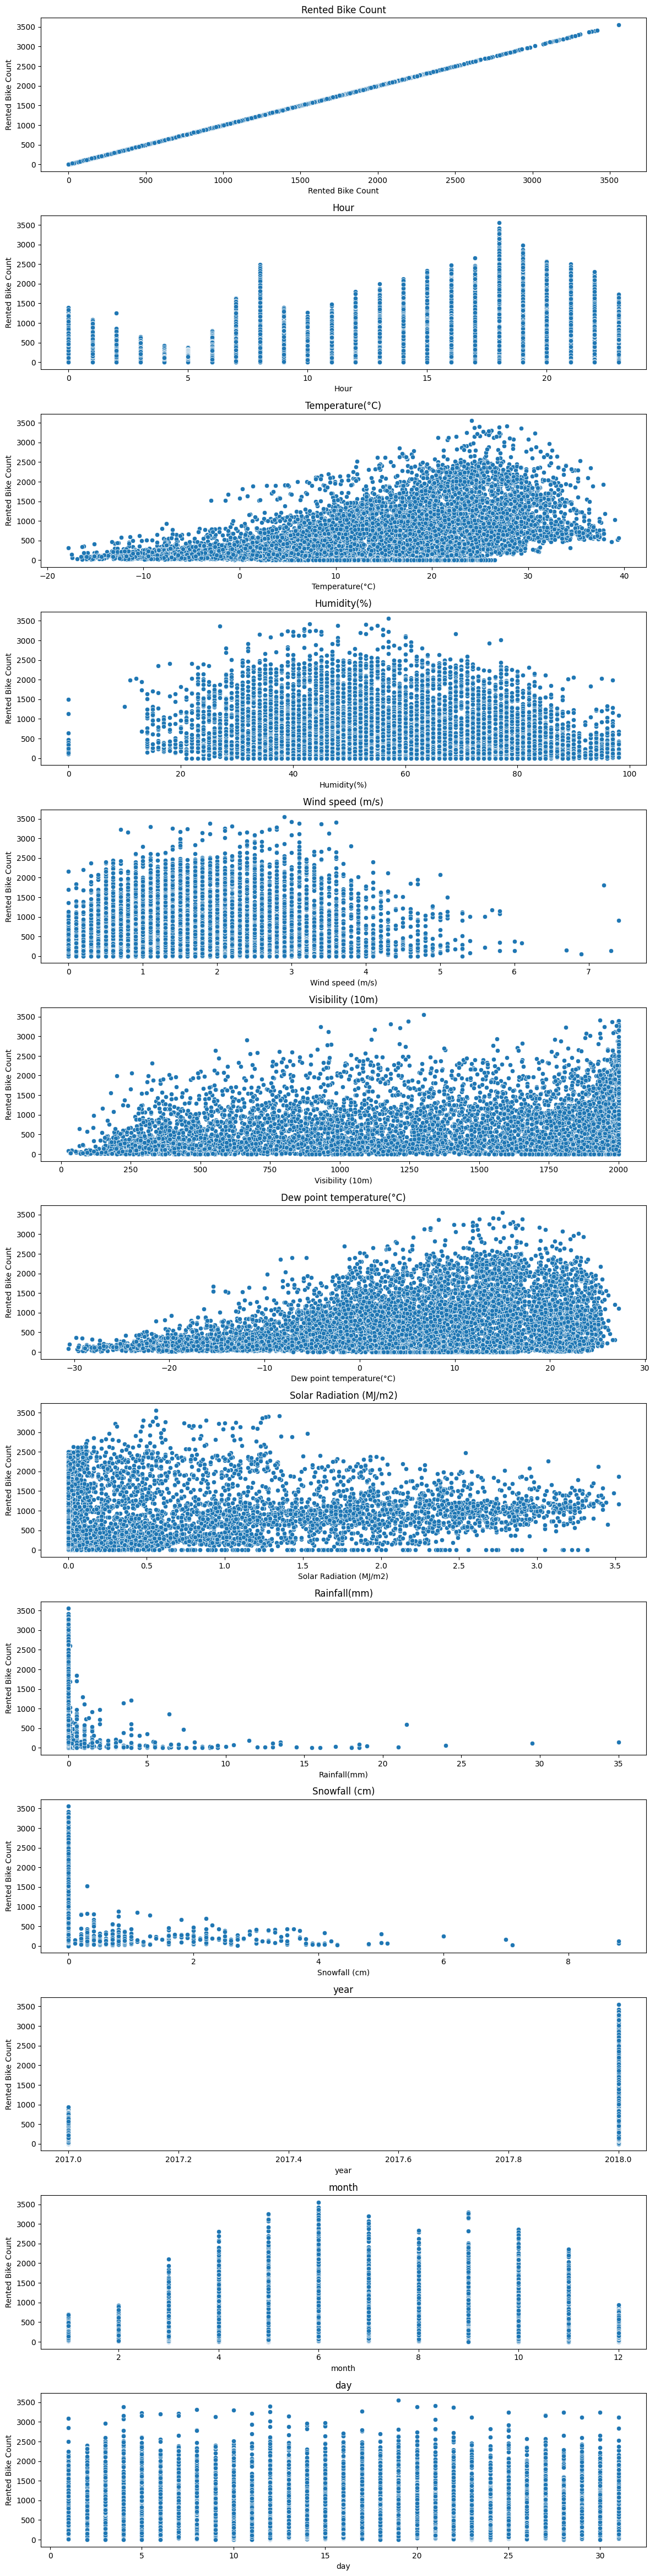

In [ ]:
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.scatterplot( x = var ,y = "Rented Bike Count" ,data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()

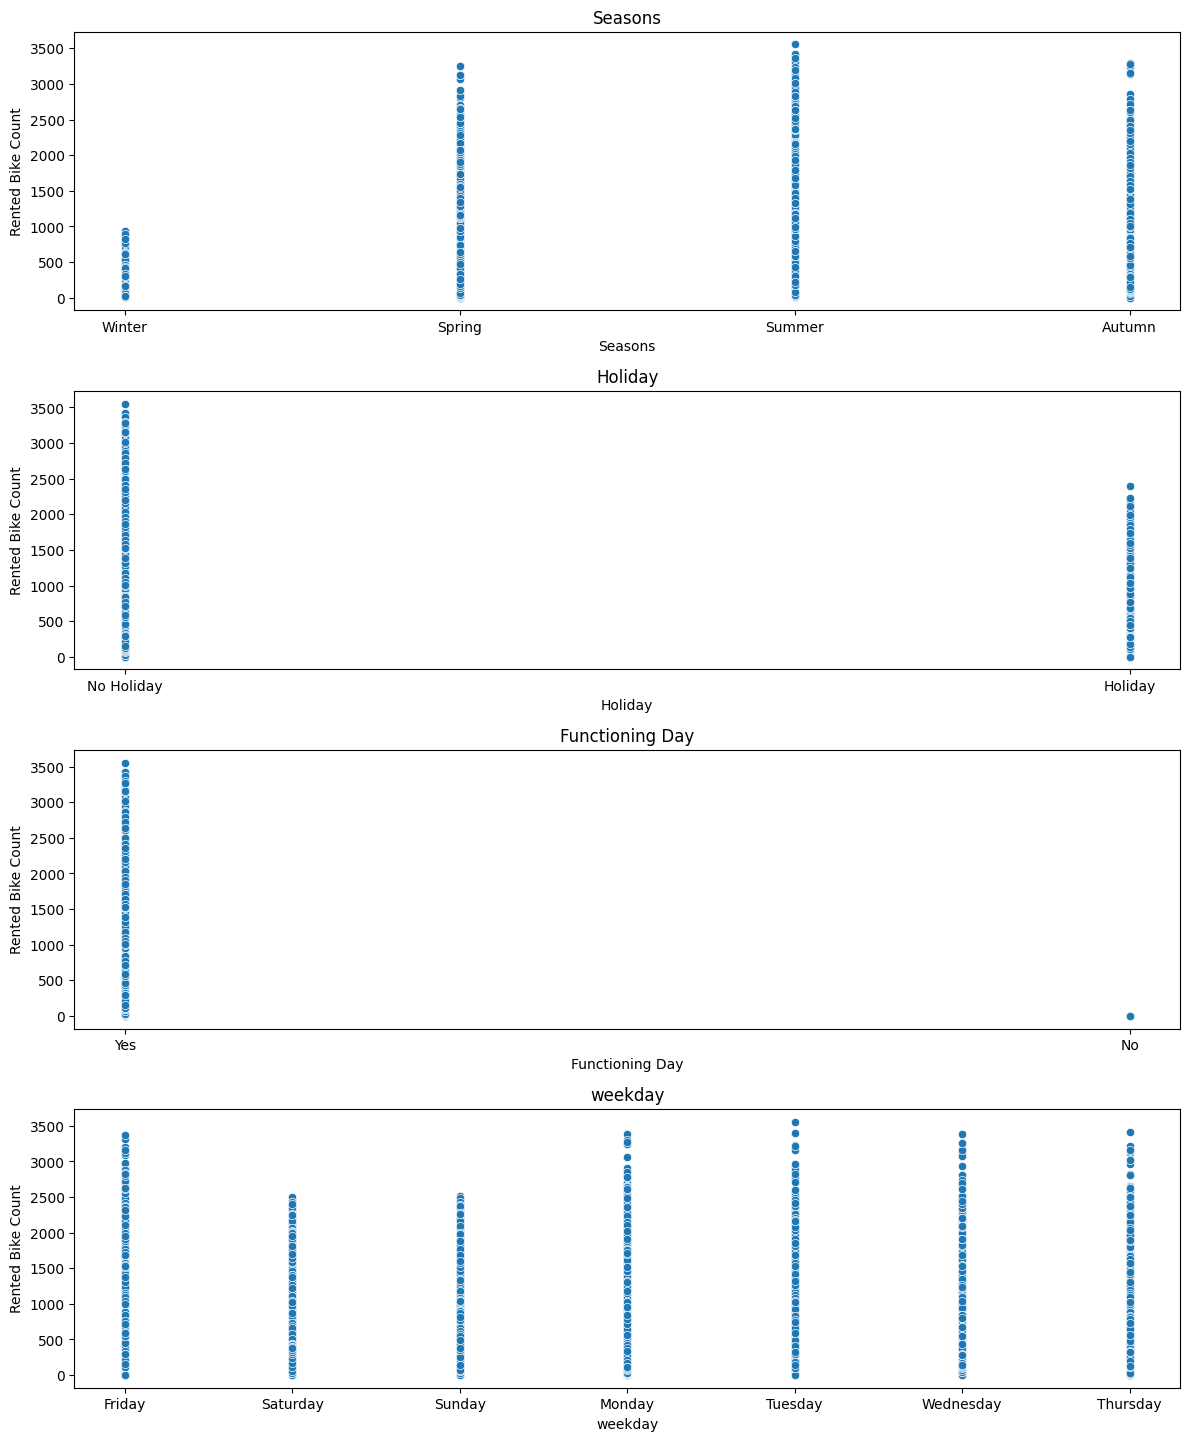

In [ ]:
# plotting the categorical variable with Rented Bike Count
plt.figure(figsize = (12,50))
counter = 1
for var in categorical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.scatterplot(x = var,y="Rented Bike Count" , data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()


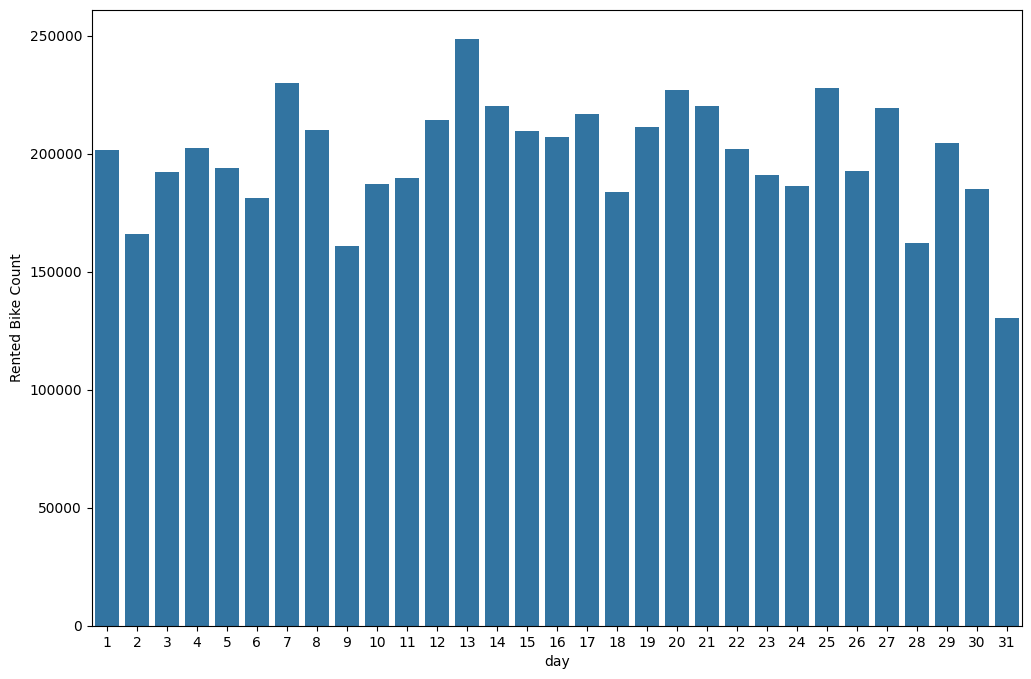

In [ ]:
# plotting the 'Rented Bike Count' with 'day'
days = df.groupby("day").sum().reset_index()
plt.figure(figsize = (12,8))
sns.barplot(x = "day", y = "Rented Bike Count",data= days )
plt.show()


We can see very date for the analysis. It can also provide the insights as per business's need.

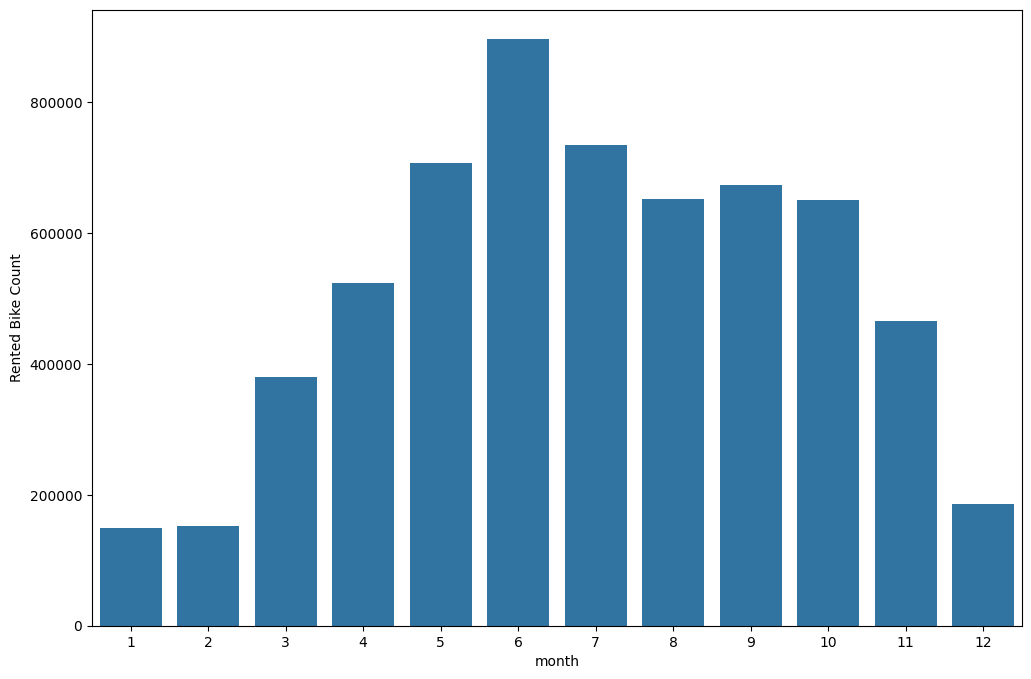

In [ ]:
# Plotting 'Rented Bike Count' with 'month'
months = df.groupby("month").sum().reset_index()
plt.figure(figsize = (12,8))
sns.barplot(x = "month", y = "Rented Bike Count",data= months )
plt.show()

People use bike mostly in the month of June and very few people in jan,feb and december. It can be seen that severe winter is not suitable for the business and severe hot is a J curve for the business.

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

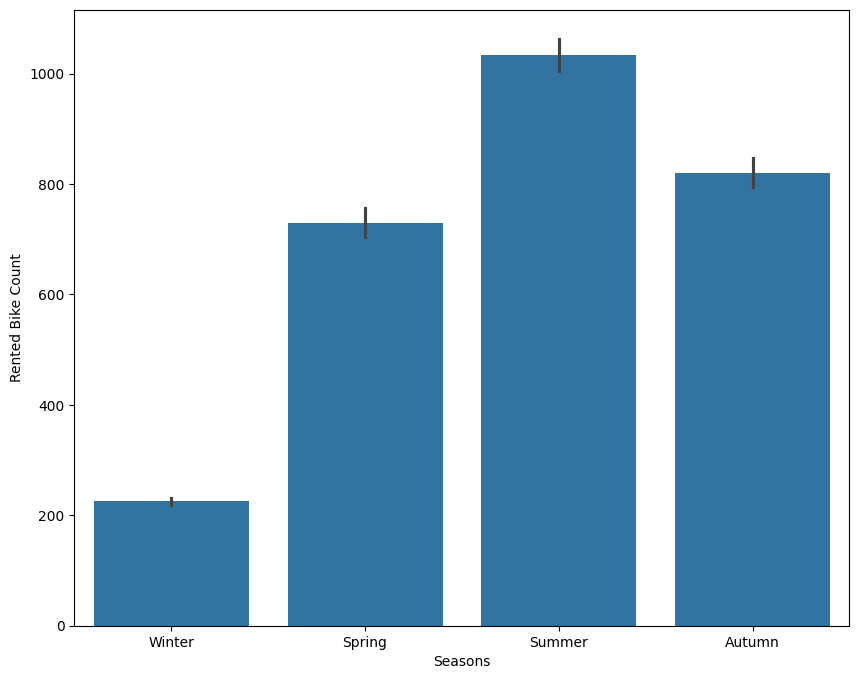

In [ ]:
#plotting 'Rented Bike Count' with 'Seasons'
plt.figure(figsize = (10,8))
sns.barplot(x = "Seasons", y = "Rented Bike Count",data= df )

We can see that summer is high and winter is lowest as per the seasons. We can see the adaptibility of people as per the weather.

##CHECKING OUTLIERS

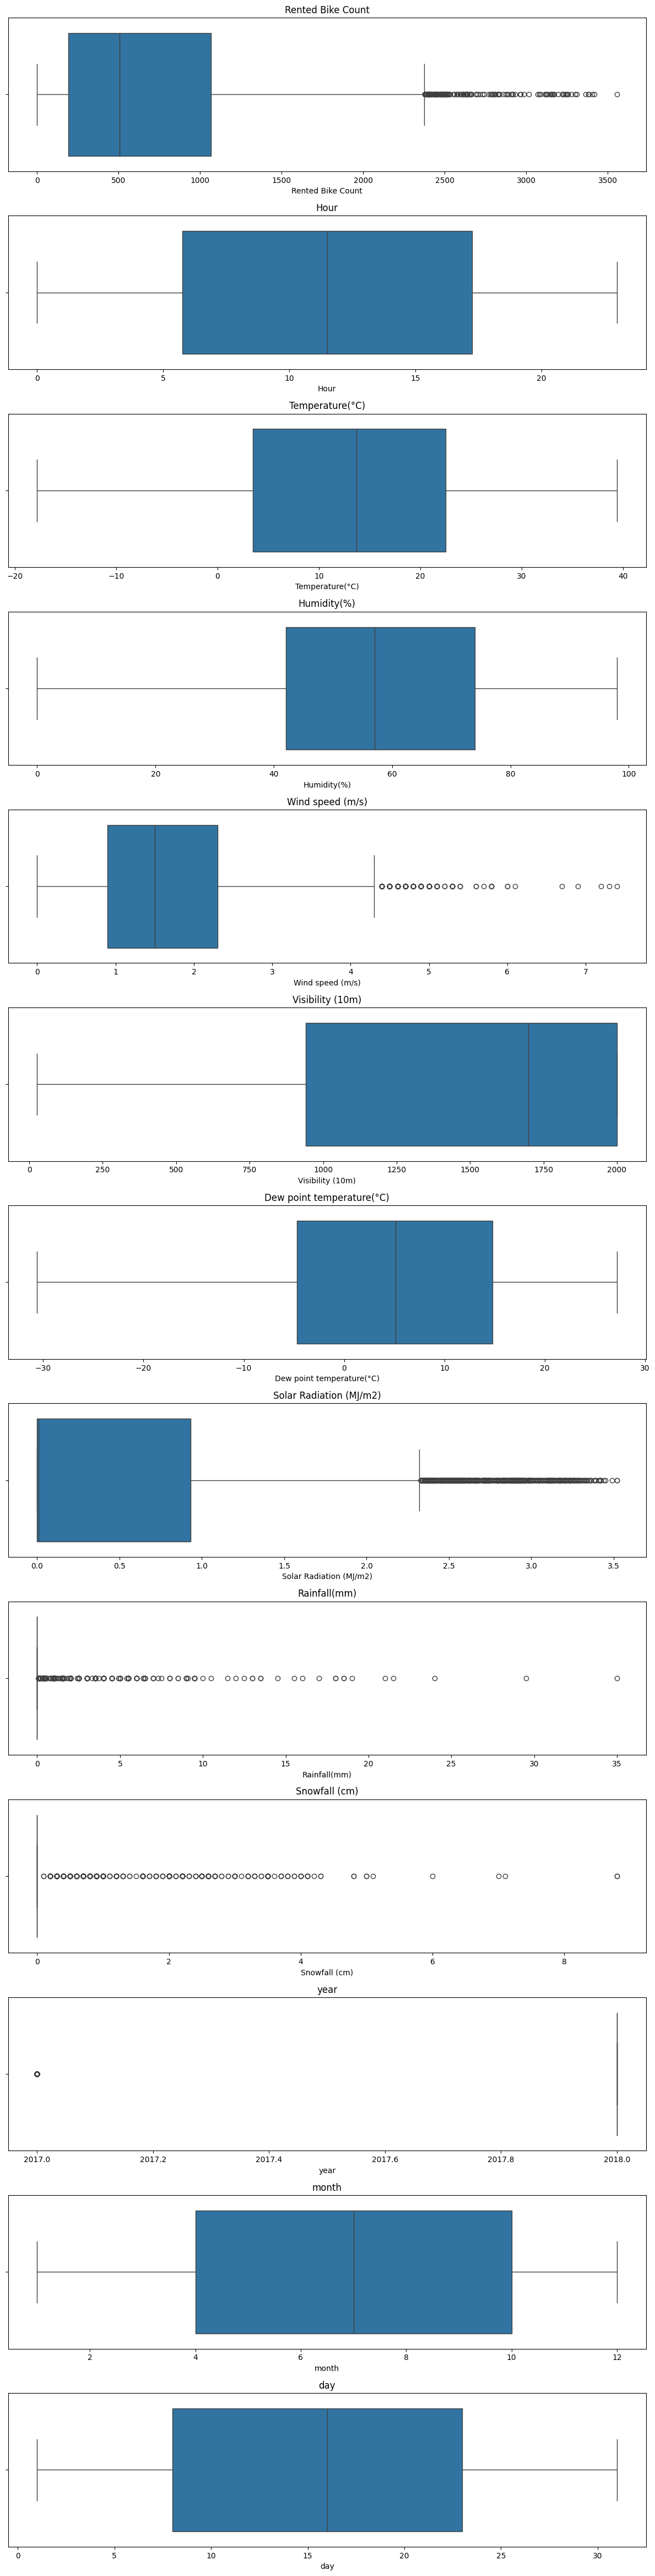

In [ ]:
# Look for the Outliers
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.boxplot(x = var, orient = "h", data =df)
        plt.title(var)
    counter += 1
plt.tight_layout()

<Axes: >

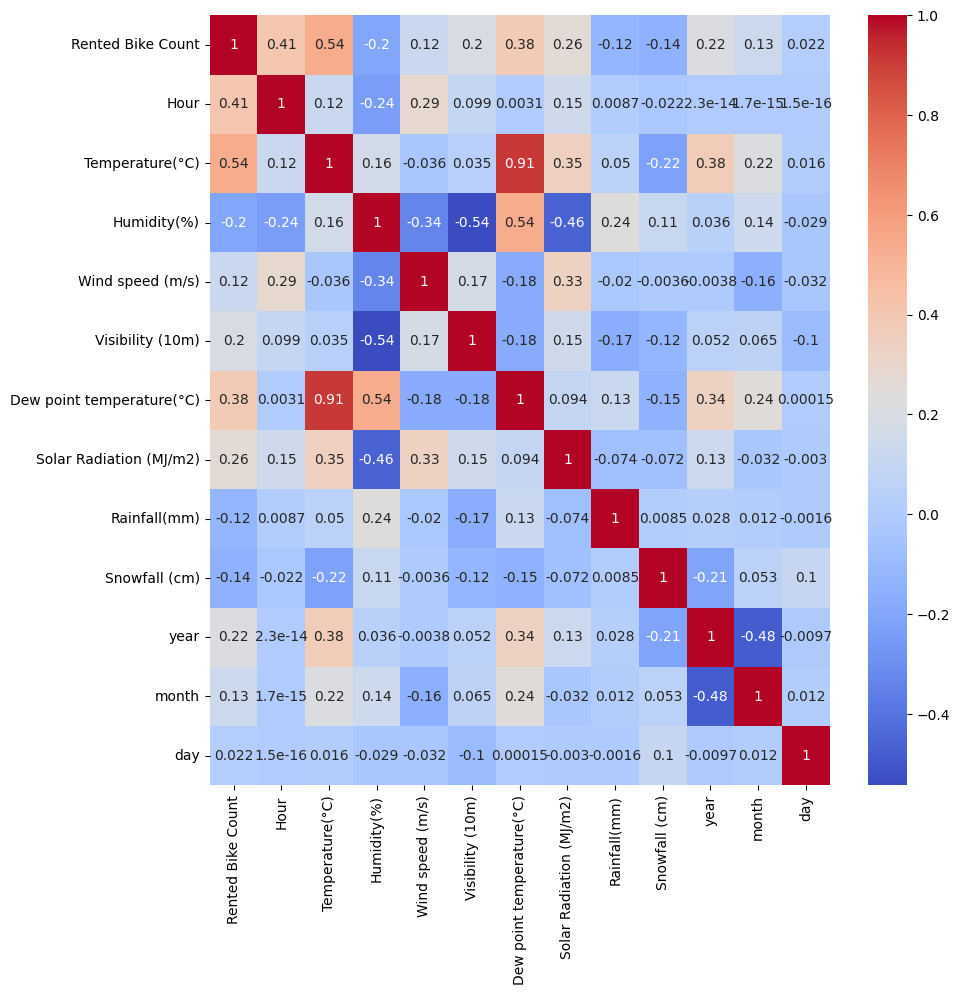

In [ ]:
# correlation between variables
plt.figure(figsize = (10,10))
sns.heatmap(df[numerical_var].corr(),annot=True, cmap = "coolwarm")

we can see Rented Bik count have good +ve correlation with Dew point temperatue , temperature and hours
we can see that Dew point temperatue has good +ve correlation with humidity
we can see there is strong +ve correlation between dew point temperature and temperature therefor it is showing multicollinearity
-- Dew point temperature is suspect but there is confusion that which has to be removed from data so we use VIF for final conclusion

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variables =  df[numerical_var]
# variables.drop(columns = "Temperature(°C)",index =1,inplace =True)
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
# vif["features"] = variables.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numerical columns from the DataFrame `df` and assign them to the variable `variables`.
variables =  df[numerical_var]

# Remove the column "Dew point temperature(°C)" from the `variables` DataFrame and drop the first row.
variables.drop(columns = "Dew point temperature(°C)",index =1,inplace =True)

# Initialize an empty DataFrame `vif` to store the Variance Inflation Factor values.
vif = pd.DataFrame()

# Calculate the VIF for each feature in the `variables` DataFrame and add the values to the `vif` DataFrame.
# The VIF values are computed by iterating over each feature column.
vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]

# Add the feature names to the `vif` DataFrame.
vif["features"] = variables.columns

In [ ]:
vif

,VIF,features
0,4.154667,Rented Bike Count
1,5.056280,Hour
2,5.012922,Temperature(°C)
3,25.008605,Humidity(%)
4,4.884438,Wind speed (m/s)
5,10.722689,Visibility (10m)
6,2.798850,Solar Radiation (MJ/m2)
7,1.109987,Rainfall(mm)
8,1.150496,Snowfall (cm)
9,64.224811,year


we can see that how Dew point temperature(°C) affecting the other variable,so it is better to remove Dew point temperature(°C)

In [ ]:
# Drop the 'Dew point temprature'.
df.drop(columns = "Dew point temperature(°C)", axis = 1 ,inplace = True)

##FEATURE ENGINEERING

In [ ]:
categorical_var

['Seasons', 'Holiday', 'Functioning Day', 'weekday']

In [ ]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


In [ ]:
# applying feature scalling
df.Holiday = df.Holiday.map({"Holiday" : 0 , "No Holiday": 1})
df['Functioning Day'] = df['Functioning Day'].map({"Yes": 1 , "No": 0})

In [ ]:
# unique values for 'Seasons'
df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# unique values for "weekday"
df['weekday'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [ ]:
# Remove leading and trailing whitespace from the values in the 'Seasons' column of the DataFrame `df`.
df['Seasons'] = df['Seasons'].str.strip()

# Remove leading and trailing whitespace from the values in the 'weekday' column of the DataFrame `df`.
df['weekday'] = df['weekday'].str.strip()


In [ ]:
# Create dummy variables for the 'Seasons' column in the DataFrame `df`, dropping the first category to avoid multicollinearity, and convert the resulting DataFrame to integer type.
df_seasons  = pd.get_dummies(df["Seasons"],drop_first = True).astype(int)

# Create dummy variables for the 'weekday' column in the DataFrame `df`, dropping the first category to avoid multicollinearity, and convert the resulting DataFrame to integer type.
df_weekday  = pd.get_dummies(df["weekday"],drop_first = True).astype(int)

NameError: name 'pd' is not defined

In [ ]:
# showing seasons and weekdays
df_seasons,df_weekday

(      Spring  Summer  Winter
 0          0       0       1
 1          0       0       1
 2          0       0       1
 3          0       0       1
 4          0       0       1
 ...      ...     ...     ...
 8755       0       0       0
 8756       0       0       0
 8757       0       0       0
 8758       0       0       0
 8759       0       0       0
 
 [8760 rows x 3 columns],
       Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
 0          0         0       0         0        0          0
 1          0         0       0         0        0          0
 2          0         0       0         0        0          0
 3          0         0       0         0        0          0
 4          0         0       0         0        0          0
 ...      ...       ...     ...       ...      ...        ...
 8755       0         0       0         0        0          0
 8756       0         0       0         0        0          0
 8757       0         0       0         0        0    

In [ ]:
# Drop the original categorical columns
df = df.drop(columns=["Seasons", "weekday"], axis=1)


In [ ]:
# cocate seasons and weekday
df= pd.concat([df,df_seasons,df_weekday],axis = 1)

In [ ]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Wednesday,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Wednesday,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# info for the 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  year                     8760 non-null   int32  
 12  month                    8760 non-null   int32  
 13  day                      8760 non-null   int32  
 14  Spring                  

In [ ]:
# upper updated 5 rows
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Wednesday,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0


## SCAILING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class.
sc = StandardScaler()

# Fit the StandardScaler to the features in `X` to compute the mean and standard deviation for scaling
sc.fit(X)

# Transform the features in `X` using the computed mean and standard deviation, and assign the scaled features to `X_scaled`.
X_scaled = sc.transform(X)

In [ ]:
# Final scaled values
X_scaled

array([[-1.66132477, -1.51395724, -1.04248288, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [-1.51686175, -1.53907415, -0.99336999, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [-1.37239873, -1.58093567, -0.94425709, ..., -0.40759561,
        -0.40759561, -0.40759561],
       ...,
       [ 1.37239873, -0.86091752, -0.94425709, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [ 1.51686175, -0.90277904, -0.8460313 , ..., -0.40759561,
        -0.40759561, -0.40759561],
       [ 1.66132477, -0.91952365, -0.74780551, ..., -0.40759561,
        -0.40759561, -0.40759561]])

In [ ]:
# now spliting training and testing
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2 , random_state = 44)

## TRAINING MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(columns = "Rented Bike Count", axis = 1)
y = df["Rented Bike Count"]

In [ ]:
# now spliting training and testing
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2 , random_state = 44)

In [ ]:
# LinearRegression algoritm
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Use the trained linear regression model `lr` to make predictions on the test dataset `X_test`, storing the predicted values in `y_pred`.
y_pred = lr.predict(X_test)

In [ ]:
#let's predict
y_pred

array([ 412.64400255,  424.59171835, 1100.3224123 , ...,  753.1374205 ,
        890.13492001,  -40.91581084])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
def get_metrics(y_test,y_pred,model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    print( f' {model_name}:  [MSE : {MSE}, RMSE : {RMSE} , MAE: {MAE}, R2 : {R2}]')

In [ ]:
# all matrics presentation
get_metrics(y_test, y_pred, "LinearRegression")

 LinearRegression:  [MSE : 182012.37791967718, RMSE : 426.6290870530011 , MAE: 319.1776483172772, R2 : 0.560944636018524]


##TRAINING MULTIPLE ALGORITHM AND HYPERPARAMETER TUNNING

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
# Train a Ridge regression model on the training data `X_train` and `y_train` and then get y_pred
rir = Ridge().fit(X_train,y_train)
y_pred_rir = rir.predict(X_test)

# Train Lasso regression and predict on test data.
lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

# Create polynomial features, train Linear Regression, and predict on test data.
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_r = LinearRegression().fit(X_train_poly,y_train)
y_pred_poly = poly_r.predict(X_test_poly)

# Train SVR and predict on test data.
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Train KNN regressor and predict on test data.
knn = KNeighborsRegressor().fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# Train Decision Tree Regressor and predict on test data.
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# Train Random Forest Regressor and predict on test data.
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# Train XGBoost Regressor and predict on test data.
xgb = XGBRegressor().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
get_metrics(y_test, y_pred, "LinearRegression")
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knn, "KNeighborsRegressor")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgb, "XGBRegressor")

 LinearRegression:  [MSE : 182012.37791967718, RMSE : 426.6290870530011 , MAE: 319.1776483172772, R2 : 0.560944636018524]
 Ridge:  [MSE : 182002.66633465327, RMSE : 426.61770513499937 , MAE: 319.1564302897582, R2 : 0.560968062576356]
 Lasso:  [MSE : 182057.47006654664, RMSE : 426.6819307945283 , MAE: 318.32893392130507, R2 : 0.5608358634768827]
 PolynomialFeatures:  [MSE : 113617.58507667611, RMSE : 337.07207697564644 , MAE: 239.90394236943493, R2 : 0.7259284739824092]
 SVR:  [MSE : 352824.3393127679, RMSE : 593.9901845256097 , MAE: 412.0958169560503, R2 : 0.14890723098594272]
 KNeighborsRegressor:  [MSE : 109300.25390410959, RMSE : 330.6058890947189 , MAE: 214.8183789954338, R2 : 0.7363428613502634]
 DecisionTreeRegressor:  [MSE : 67140.6997716895, RMSE : 259.1152248936552 , MAE: 143.40296803652967, R2 : 0.8380413205236014]
 RandomForestRegressor:  [MSE : 28596.757726027397, RMSE : 169.10575899722457 , MAE: 100.2682077625571, R2 : 0.931018098793084]
 XGBRegressor:  [MSE : 23516.128149

we have algorithm which is performing well 1. RandomForestRegressor , 2. XGBRegressor¶

HyperPerameter Tuning RandomForest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#number of tree in randomforest

n_estimators = [int(x) for x in np.linspace(start = 200 , stop = 2000, num = 10)]

#number of features to consider at every split
max_features = ["auto", "sqrt"]

#maximum number of level allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120, num=12)]

#maximun number of sample required to split a node
min_samples_split = [2, 5,10]

#maximum number of sample required at each leaf node
min_samples_leaf =  [1,2,4]

#method of selecting sample for training each tree
bootstrap = [True, False]

#create the random grid
random_grid = {
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap }

In [ ]:
import time
start_time = time.time()

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf , param_distributions = random_grid, n_iter = 100 , cv = 3, verbose =2, random_state = 42, n_jobs= -1 )
rf_random.fit(X_train,y_train)
y_pred_rf_random = rf_random.predict(X_test)
print(f'time taken to traning using randomized search', time.time() - start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tuning")

 RandomForestRegressor Fine Tuning:  [MSE : 28104.490957815848, RMSE : 167.64394101134656 , MAE: 98.79818126223091, R2 : 0.9322055585008434]


**HYPERPARAMETER TUNNING FOR XGBBooster**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

# Setting up Hyperparameter Grid
params = {
            'max_depth': [3,5,6,10,15,20],
            'learning_rate': [0.01, 0.1, 0.2, 0.3],
            'subsample': np.arange(0.5,1.0,0.1),
            'colsample_bytree': np.arange(0.4,1.0,0.1),
            'colsample_bylevel': np.arange(0.4,1.0,0.1),
            'n_estimator': [100,500,1000]
         }
# Initialising the XGBRegressor
xgbr = XGBRegressor(seed = 20)

# Setting Up and Running RandomizedSearchCV:
rscv = RandomizedSearchCV(estimator = xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter =25,
                         cv =5,
                         verbose = 1)
rscv.fit(X_train, y_train)

#Making Predictions with the Best Model
y_pred_xgbr_random = rscv.predict(X_test)
get_metrics(y_test,y_pred_xgbr_random,"XGBRegressor with Best Perameters")
print("Time taken to hypertune" , time.time() - start_time)
print("best perameters" ,rscv.best_params_)

## SAVE MODEL AND DEPLOYMENT PROCESS

In [ ]:
import joblib

# Save the best model
joblib.dump(rscv.best_estimator_, 'xgb_best_model.pkl')

NameError: name 'joblib' is not defined

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
model = joblib.load('xgb_best_model.pkl')

@app.route('/')
def home():
    return "Seoul Bike Sharing Demand Prediction API"

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json(force=True)

    # Convert data into numpy array
    features = np.array([data['features']])

    # Predict using the loaded model
    prediction = model.predict(features)

    # Send back the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})

if __name__ == "__main__":
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'xgb_best_model.pkl'

##CONCLUSION

Thus we have performed a machine learning task for the bike rates prediction and this was helpful to understand the wholo step by step process. finlally hyperparameter tunning performed for the two algorithms and we have got excellent perfomance after this.